<a href="https://colab.research.google.com/github/Yatharth19/ML/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv');

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
df.shape

(4340, 8)

In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
df1=pd.read_csv('/content/Car details v3.csv')

In [ ]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df1.shape

(8128, 13)

In [ ]:
df2=pd.read_csv('/content/car data.csv')

In [ ]:
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df2.shape

(301, 9)

In [ ]:
correlation=df.corr()

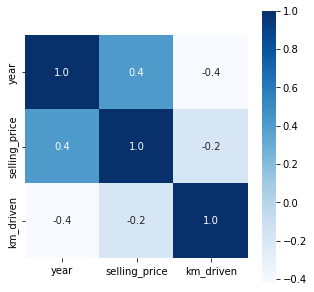

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

In [ ]:
correlation1=df1.corr()

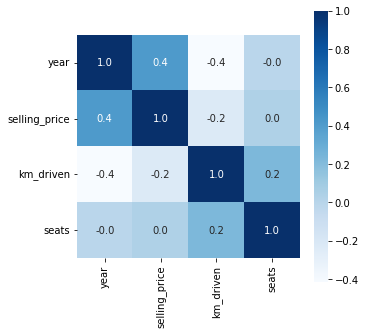

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation1,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

In [ ]:
df_fuel=LabelEncoder()

In [ ]:
df['fuel_le']=df_fuel.fit_transform(df['fuel'])

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_le
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1


In [ ]:
df.fuel_le.unique()

array([4, 1, 0, 3, 2])

In [ ]:
df.shape

(4340, 9)

In [ ]:
owner_le=LabelEncoder()
df['owner_le']=owner_le.fit_transform(df['owner'])

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_le,owner_le
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,4,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1,2


In [ ]:
df.shape

(4340, 10)

In [ ]:
transmission_le=LabelEncoder()
df['transmission_le']=transmission_le.fit_transform(df['transmission'])

In [ ]:
df.shape

(4340, 11)

In [ ]:
df.drop(['owner','transmission'],axis=1,inplace=True)
#df=df.drop(columns='owner')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,fuel_le,owner_le,transmission_le
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,4,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,4,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,0,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,4,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,2,1


In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
seller_le=LabelEncoder()
df['seller_le']=seller_le.fit_transform(df['seller_type'])

In [ ]:
df.drop(['seller_type'],axis=1,inplace=True)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,fuel_le,owner_le,transmission_le,seller_le
0,Maruti 800 AC,2007,60000,70000,Petrol,4,0,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,4,0,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,0,1,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,4,0,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,2,1,1


In [ ]:
df.drop(['fuel'],axis=1,inplace=True)

In [ ]:
len(df['name'].unique())

1491

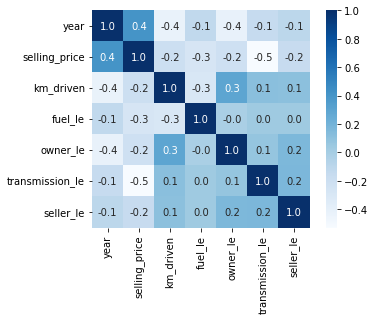

In [ ]:
correlation=df.corr()
plt.plot(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

In [ ]:
X=df.drop(['selling_price'],axis=1)
y=df['selling_price']

In [ ]:
X.drop(['name'],axis=1,inplace=True)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(X_train,Y_train)

0.46312591033989103

In [ ]:
model.score(X_test,Y_test)

0.3986768138035186

In [ ]:
y_predicted=model.predict(X_test)

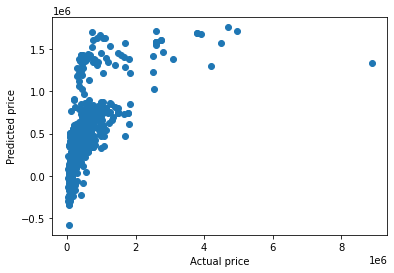

In [ ]:
plt.scatter(Y_test,y_predicted)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [ ]:
model2=RandomForestRegressor()
model2.fit(X_train,Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model2.score(X_train,Y_train)

0.9298864403310407

In [ ]:
y_predicted_again=model.predict(X_test)

In [ ]:
model.score(X_test,Y_test)

0.3986768138035186

In [ ]:
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df2.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
fuel_le=LabelEncoder()
df2['fuel_le']=fuel_le.fit_transform(df2['Fuel_Type'])

In [ ]:
seller_le=LabelEncoder()
df2['seller_le']=seller_le.fit_transform(df2['Seller_Type'])

In [ ]:
transmission_le=LabelEncoder()
df2['transmission_le']=transmission_le.fit_transform(df2['Transmission'])

In [ ]:
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,fuel_le,seller_le,transmission_le
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,1


In [ ]:
df2.drop(['Car_Name','Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)

In [ ]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,fuel_le,seller_le,transmission_le
0,2014,3.35,5.59,27000,0,2,0,1
1,2013,4.75,9.54,43000,0,1,0,1
2,2017,7.25,9.85,6900,0,2,0,1
3,2011,2.85,4.15,5200,0,2,0,1
4,2014,4.60,6.87,42450,0,1,0,1


In [ ]:
X=df2.drop(['Selling_Price'],axis=1)
y=df2['Selling_Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
X_train.shape

(270, 7)

In [ ]:
y_train.shape

(270,)

In [ ]:
model3=LinearRegression()
model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model3.score(X_train,y_train)

0.8793190627839345

In [ ]:
model3.score(X_test,y_test)

0.8641991804984303